# Random Forest Classifier

# Imports

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import plot_roc_curve


In [64]:
df = pd.read_csv("./data/train.csv")
y =df["class"]
x = df.drop(["molecule", "conformation", "class"], axis = 1)
y = y.abs()
x = x.abs()

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.8, random_state=42)

In [66]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
rfc_predict = rfc.predict(x_test)

In [67]:
accuracy_rfc = metrics.accuracy_score(y_test, rfc_predict)
print(accuracy_rfc)
print(metrics.classification_report(y_test, rfc_predict))

0.7884615384615384
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       142
         1.0       0.80      0.71      0.75       118

    accuracy                           0.79       260
   macro avg       0.79      0.78      0.78       260
weighted avg       0.79      0.79      0.79       260



# Plot

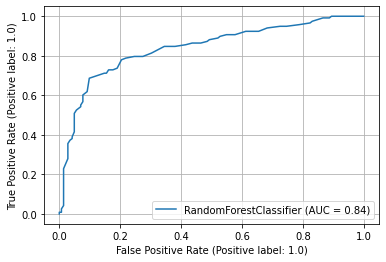

In [68]:
rfc_disp = plot_roc_curve(rfc, x_test, y_test)
plt.grid()
plt.savefig("random_forest_roc.png")

# Grid-search tuning
The cell below takes a long time to finish.

In [69]:
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,64, 128, None],
    "min_samples_split":np.linspace(0.1, 1.0, 10),
    "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
}
# Put all the shit in the gridsearch, let it work
run = False
cv = False
def tune_params():
    global cv
    if run:
        cv = GridSearchCV(rfc,parameters,cv=5, n_jobs=8)
        cv.fit(x,y.values.ravel())

In [70]:
# Calculate best params

#Very sexy
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

if run:
    display(cv)

# Random forest with tuned hyperparameters

In [71]:
rfc_hyper = RandomForestClassifier(random_state=42, max_depth=20, n_estimators=1000, min_samples_split=0.6, min_samples_leaf=0.2, max_features=166)
rfc_hyper.fit(x_train,y_train)
rfc_predict = rfc_hyper.predict(x_test)

In [72]:
accuracy_rfc = metrics.accuracy_score(y_test, rfc_predict)
print(accuracy_rfc)
print(metrics.classification_report(y_test, rfc_predict))

0.7153846153846154
              precision    recall  f1-score   support

         0.0       0.69      0.88      0.77       142
         1.0       0.78      0.52      0.62       118

    accuracy                           0.72       260
   macro avg       0.73      0.70      0.70       260
weighted avg       0.73      0.72      0.70       260



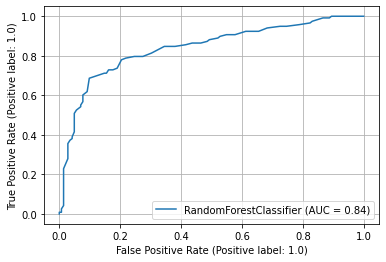

In [73]:
rfc_disp = plot_roc_curve(rfc, x_test, y_test)
plt.grid()